In [1]:
!pip install requests
!pip install lxml
!pip install bs4


  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=0fa2d7434335f4a717d479bb8f156e526cc81643cce5503ea520254e9bf7471f
  Stored in directory: c:\users\nasik\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [2]:
#importing libraries
import requests 

In [3]:
url = "https://www.worldometers.info/coronavirus/"
result = requests.get(url)

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 46,709,156 Cases and 1,203,771 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link
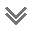

In [4]:
result.text

In [5]:
#beautiful soup to restructure the file nicely
import bs4

In [6]:
soup = bs4.BeautifulSoup (result.text, 'lxml')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 46,709,156 Cases and 1,203,771 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
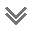

In [7]:
soup

In [8]:
#the data is well structured now!

In [11]:
#find_all method

cases = soup.find_all('div', class_ ='maincounter-number')

In [12]:
cases

[<div class="maincounter-number">
 <span style="color:#aaa">46,709,156 </span>
 </div>,
 <div class="maincounter-number">
 <span>1,203,771</span>
 </div>,
 <div class="maincounter-number" style="color:#8ACA2B ">
 <span>33,639,417</span>
 </div>]

In [13]:
### storing the data

In [14]:
#python list 
data = []

In [15]:
#find the span and get the data from it
for i in cases:
    span = i.find('span')
    print(span) #it returns data with the tags
    print (span.string)
    data.append(span.string)

<span style="color:#aaa">46,709,156 </span>
46,709,156 
<span>1,203,771</span>
1,203,771
<span>33,639,417</span>
33,639,417


In [16]:
data

['46,709,156 ', '1,203,771', '33,639,417']

In [17]:
import pandas as pd 

In [18]:
df = pd.DataFrame({'CoronaData' : data})

In [20]:
#naming the columns 
df.index = ['Total Cases', 'Total Deaths', 'Total Recovered'] 

In [21]:
df

,CoronaData
Total Cases,"46,709,156"
Total Deaths,"1,203,771"
Total Recovered,"33,639,417"


In [22]:
df.to_csv('Corona_Data.csv')

In [24]:
df.dtypes

CoronaData    object
dtype: object